In [ ]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np

In [ ]:
'''
Generate Swiss Roll dataset
'''
X, c = make_swiss_roll(n_samples=1000, noise=0.2, random_state=21)

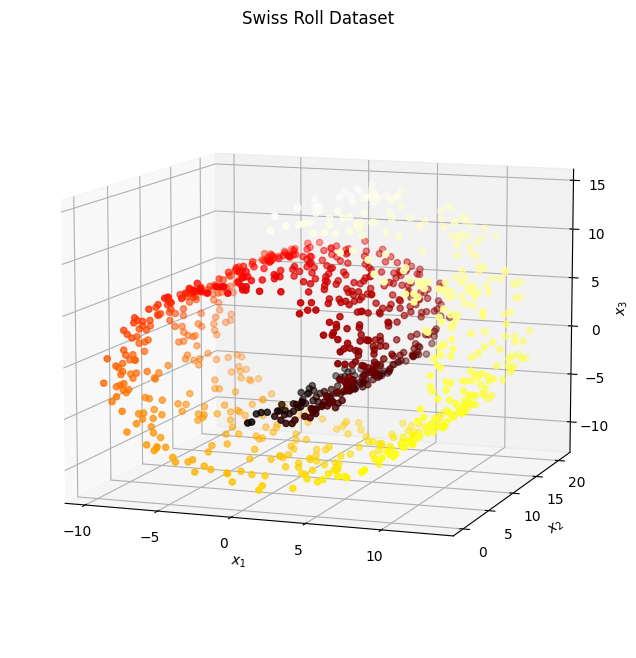

In [ ]:
'''
Plot the resulting generated Swiss roll dataset.
'''
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=c, cmap='hot')
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
plt.title('Swiss Roll Dataset')
ax.view_init(10, -70)
plt.show()

In [ ]:
'''
Use Kernel PCA (kPCA) with linear kernel (2 points), a RBF kernel (2 points), and a sigmoid kernel (2 points).
'''
# linear
kpca_linear = KernelPCA(n_components=2, kernel='linear')
X_kpca_linear = kpca_linear.fit_transform(X)

In [ ]:
# rbf
kpca_rbf = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_kpca_rbf = kpca_rbf.fit_transform(X)

In [ ]:
# sigmoid
kpca_sigmoid = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.001, coef0=1)
X_kpca_sigmoid = kpca_sigmoid.fit_transform(X)

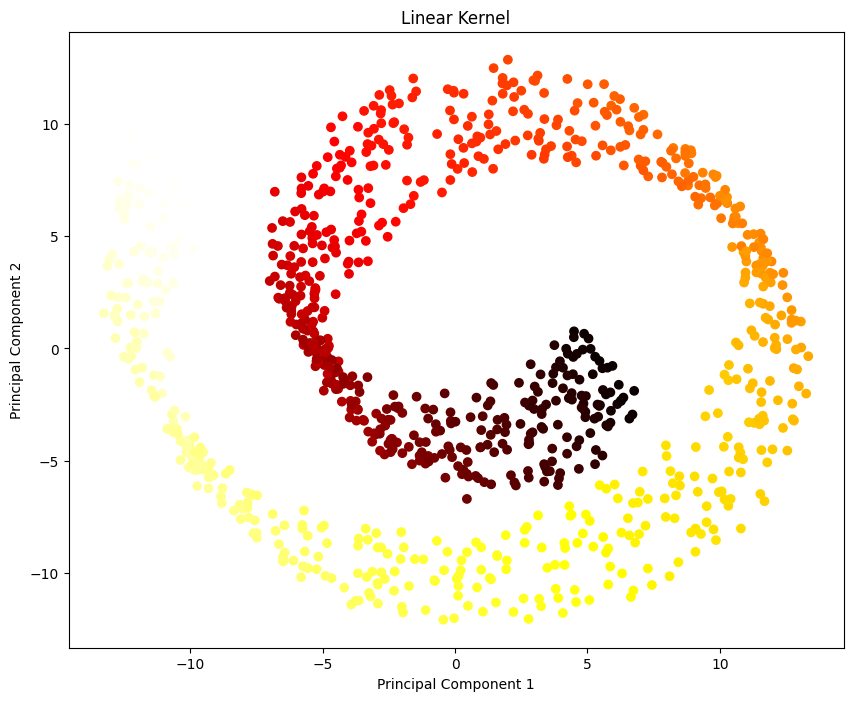

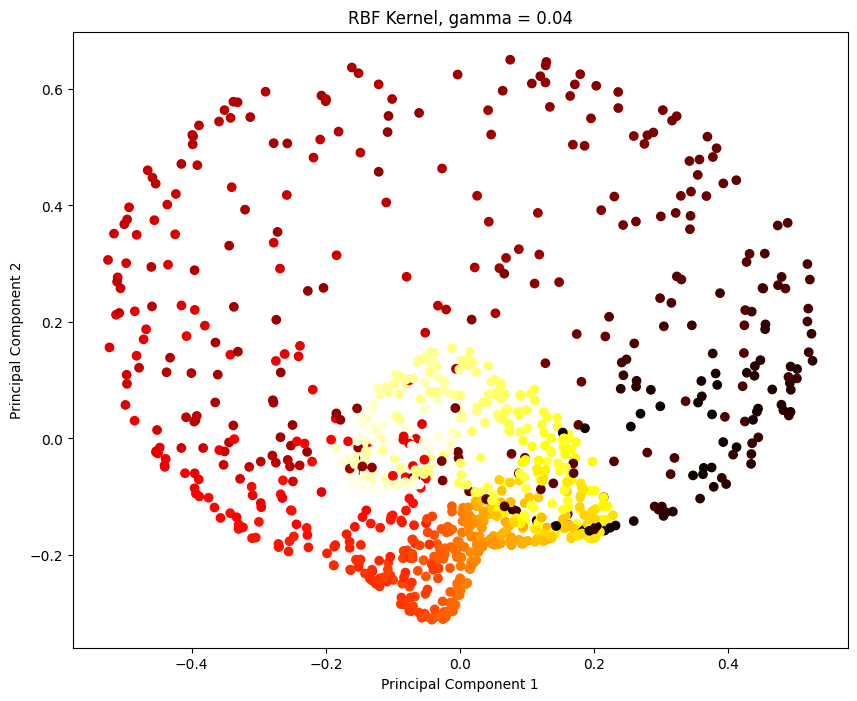

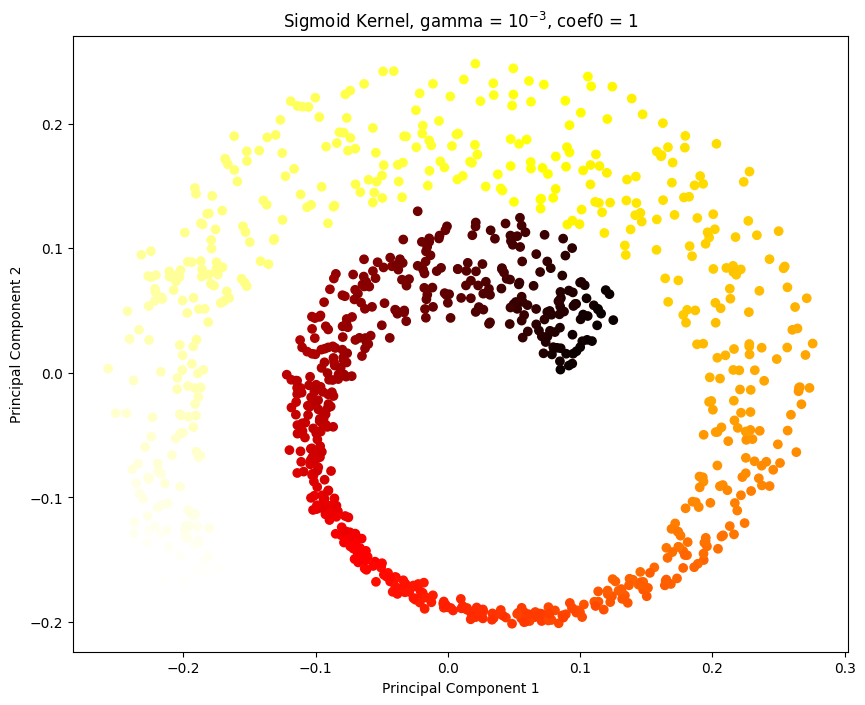

In [ ]:
'''
Plot the kPCA results of applying the linear kernel (2 points), a RBF kernel (2 points), and a sigmoid kernel (2 points) from (3).
Explain and compare the results.
'''
def plot_kpca(X_kpca, title):
  plt.figure(figsize=(10, 8))
  plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=c, cmap='hot')
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.title(title)
  plt.show()

plot_kpca(X_kpca_linear, 'Linear Kernel')
plot_kpca(X_kpca_rbf, 'RBF Kernel, gamma = 0.04')
plot_kpca(X_kpca_sigmoid, 'Sigmoid Kernel, gamma = $10^{-3}$, coef0 = 1' )

In [ ]:
'''
Using kPCA and a kernel of your choice, apply Logistic Regression for classification.
Use GridSearchCV to find the best kernel and gamma value for kPCA in order to get the best classification accuracy at the end of the pipeline.
Print out best parameters found by GridSearchCV.
'''
clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.01, 0.1, 100),
        "kpca__kernel": ["rbf"]
    }]

y = c > 6.7
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.01      , 0.01090909, 0.01181818, 0.01272727, 0.01363636,
       0.01454545, 0.01545455, 0.01636364, 0.01727273, 0.01818182,
       0.01909091, 0.02      , 0.02090909, 0.02181818, 0.02272727,
       0.02363636, 0.02454545, 0.02545455, 0.02636364, 0.027...
       0.06909091, 0.07      , 0.07090909, 0.07181818, 0.07272727,
       0.07363636, 0.07454545, 0.07545455, 0.07636364, 0.07727273,
       0.07818182, 0.07909091, 0.08      , 0.08090909, 0.08181818,
       0.08272727, 0.08363636, 0.08454545, 0.08545455, 0.08636364,
       0.08727273, 0.08818182, 0.08909091, 0.09      , 0.09090909,
       0.09181818, 0.09272727, 0.09363636, 0.09454545, 0.09545455,
       0.09636364, 0.09727273, 0.09818182, 0.09909091, 0.1       ]),
                          'kpca__kernel': ['rbf']}])

In [ ]:
print('Best Accuracy', grid_search.best_score_)
print('Best Parameter', grid_search.best_params_)

Best Accuracy 0.922014829200458
Best Parameter {'kpca__gamma': 0.026363636363636367, 'kpca__kernel': 'rbf'}


In [ ]:
'''
Plot the results from using GridSearchCV in (5).
'''
kpca_rbf_best = KernelPCA(n_components = 2, kernel="rbf", gamma= 0.026)
X_kpca_rbf_best = kpca_rbf_best.fit_transform(X)

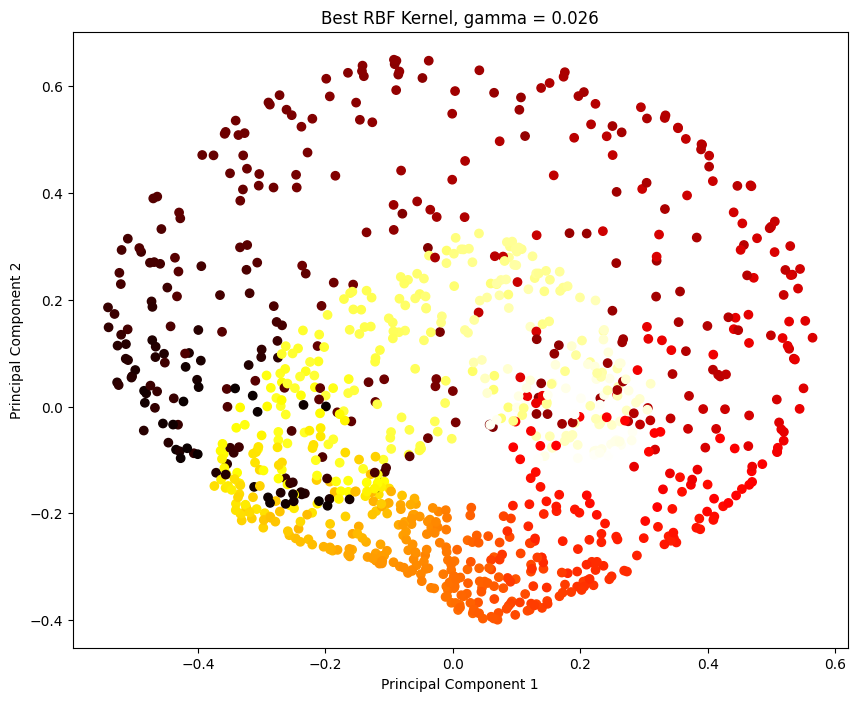

In [ ]:
plot_kpca(X_kpca_rbf_best, 'Best RBF Kernel, gamma = 0.026')

In [ ]:
'''
Create a video discussing the code and result for each question. Discuss challenges you confronted and solutions to overcoming them, if applicable
'''